In [ ]:
##ARIMA MODELLING FOR USAGE VARIABLE##

# 1)ARIMA MODEL

In [1]:
#importing lib 

import pandas as pd
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf,pacf
import numpy as np
import statsmodels.tsa.stattools as ts
import math
import matplotlib.pyplot as plt
import statsmodels.api as sm 




C:\Users\nikhil\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#loading file
dataset = read_csv('F:/2018/cdac_project/19-072018/outlier_removed1.csv',index_col='Date_Time',parse_dates=True)

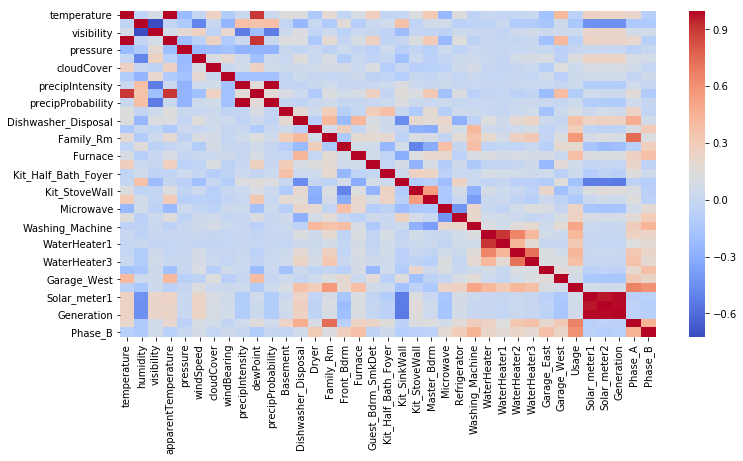

In [3]:
# spearman correlation heatmap
# Determines how variable are correated to each other
pyplot.figure(figsize=(12,6))
sns.heatmap(dataset.corr(method='spearman'),cmap='coolwarm')



#series.set_index(['Date_Time'])
#series['2014-01-01':'2017-01-01'].WaterHeater.plot()

#pyplot.show()



In [115]:
#Pearson correlation heatmap
# Determines how variable are correated to each other
#pyplot.figure(figsize=(12,6))
#sns.heatmap(dataset.corr(),cmap='coolwarm')

In [116]:
# kendall correlation heatmap
#Determines how variable are correated to each other
#pyplot.figure(figsize=(12,6))
#sns.heatmap(dataset.corr(method='kendall'),cmap='coolwarm')

In [4]:
#Correation Table
dataset.corr(method='spearman')

,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,...,WaterHeater2,WaterHeater3,Garage_East,Garage_West,Usage,Solar_meter1,Solar_meter2,Generation,Phase_A,Phase_B
temperature,1.000000,-0.036349,0.081082,0.996895,-0.221526,-0.007759,0.260715,-0.101855,0.022705,0.901334,...,-0.005609,0.020935,-0.183889,0.413883,-0.057608,0.260125,0.243480,0.245405,0.215499,-0.077213
humidity,-0.036349,1.000000,-0.723316,-0.011728,-0.117772,-0.490533,0.006087,-0.256810,0.386563,0.360919,...,-0.107786,-0.108032,-0.153462,0.036337,-0.140394,-0.432067,-0.441746,-0.440904,-0.118087,-0.123586
visibility,0.081082,-0.723316,1.000000,0.068017,0.190931,0.263719,-0.039314,0.202507,-0.530043,-0.197901,...,0.048595,0.058815,0.033961,0.049462,0.042738,0.220828,0.224752,0.224188,0.063168,0.063787
apparentTemperature,0.996895,-0.011728,0.068017,1.000000,-0.204532,-0.060124,0.253734,-0.115562,0.021030,0.906454,...,-0.007156,0.017690,-0.186053,0.415630,-0.058617,0.251397,0.234290,0.236440,0.210691,-0.075724
pressure,-0.221526,-0.117772,0.190931,-0.204532,1.000000,-0.228737,-0.217751,-0.181706,-0.270233,-0.259575,...,0.013958,0.021190,0.005424,-0.069818,0.001482,0.021247,0.011420,0.016999,-0.061993,0.009022
windSpeed,-0.007759,-0.490533,0.263719,-0.060124,-0.228737,1.000000,0.098935,0.191091,0.044387,-0.185037,...,0.074662,0.088384,0.113390,-0.044532,0.118292,0.236503,0.247448,0.244864,0.095469,0.073671
cloudCover,0.260715,0.006087,-0.039314,0.253734,-0.217751,0.098935,1.000000,0.021244,0.070214,0.255650,...,0.004553,0.024875,-0.077683,0.138019,0.042334,0.110334,0.095528,0.099351,0.067761,-0.008144
windBearing,-0.101855,-0.256810,0.202507,-0.115562,-0.181706,0.191091,0.021244,1.000000,-0.183479,-0.188784,...,-0.000486,-0.003229,0.052328,-0.065128,0.034489,0.063455,0.063358,0.064513,-0.010326,0.046330
precipIntensity,0.022705,0.386563,-0.530043,0.021030,-0.270233,0.044387,0.070214,-0.183479,1.000000,0.169502,...,0.017550,0.028547,0.021851,-0.000834,0.039608,-0.107310,-0.102393,-0.105046,0.053701,-0.001001
dewPoint,0.901334,0.360919,-0.197901,0.906454,-0.259575,-0.185037,0.255650,-0.188784,0.169502,1.000000,...,-0.054152,-0.027021,-0.221116,0.398504,-0.101978,0.054223,0.035137,0.036842,0.159390,-0.109207


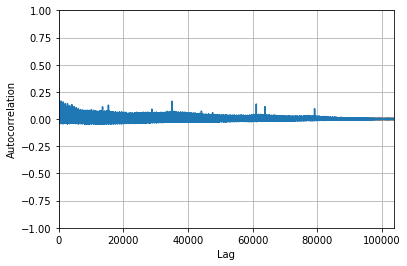

In [72]:
'''
#ACF Method 1
# implementing autocorrelation_plot to select the value of p in ARIMA(p=lag  in autoregression)
Usage_df=dataset['2014-01-01':'2017-01-01'].Usage

#dff2
autocorrelation_plot(Usage_df)
'''

In [195]:
'''
#ACF Method 2
#auto-correation Function
acf=acf(Usage_df)
'''

'\n#ACF Method 2\n#auto-correation Function\nacf=acf(Usage_df)\n'

In [156]:
'''#determines the value of p(auto_regression la)
acf_1=pandas.DataFrame([acf]).T
acf_1.columns=['Autocorrelation']
acf_1.index+=1
acf_1.plot(kind='bar')
'''

"#determines the value of p(auto_regression la)\nacf_1=pandas.DataFrame([acf]).T\nacf_1.columns=['Autocorrelation']\nacf_1.index+=1\nacf_1.plot(kind='bar')\n"

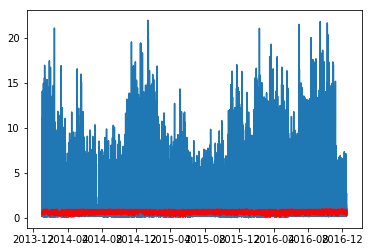


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=132.0269, p=0.0000  , df_denom=103671, df_num=1
ssr based chi2 test:   chi2=132.0307, p=0.0000  , df=1
likelihood ratio test: chi2=131.9467, p=0.0000  , df=1
parameter F test:         F=132.0269, p=0.0000  , df_denom=103671, df_num=1
{1: ({'ssr_ftest': (132.026906092089, 1.5403393320576401e-30, 103671.0, 1), 'ssr_chi2test': (132.03072664671154, 1.4732120856396553e-30, 1), 'lrtest': (131.9467261894606, 1.5368869352764417e-30, 1), 'params_ftest': (132.02690609212692, 1.5403393320218725e-30, 103671.0, 1)}, [<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002C98C2D5CC0>, <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002C98C2E06A0>, array([[0., 1., 0.]])])}


In [139]:
'''
#ACF Method 3
#granger test ti check how onw variable is dependent on other variable-to find value of p
pyplot.plot(dataset['Usage'])
pyplot.plot(dataset['humidity'], color='red')
pyplot.show()
print(sm.tsa.stattools.grangercausalitytests(dataset[['Usage','temperature']].dropna(),1))
'''

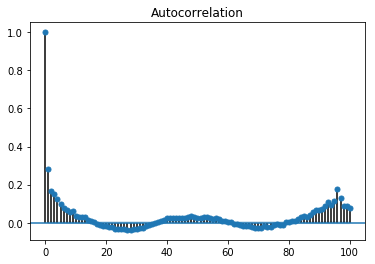

In [3]:
#implementing autocorrelation_function to select the value of q in ARIMA(q=lag in moving average(error))
#ACF Method 4
#Autocorrelation, also known as serial correlation, is the correlation of a signal with a delayed copy of itself as a function of delay.
Usage_df=dataset['2014-01-01':'2017-01-01'].Usage

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(Usage_df,lags=100)
pyplot.show()


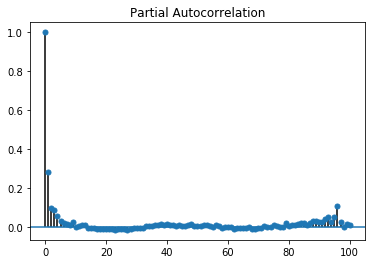

In [170]:
#implementing autocorrelation_function to select the value of p in ARIMA(p=lag in AutoRegression)
#A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(Usage_df, lags=100)
pyplot.show()

In [6]:
#resampling and suming for one week

df = Usage_df.resample("10800T").sum()

#one day
#df = Usage_df.resample("1400T").sum()
#one month
#df = Usage_df.resample("43200T").sum()

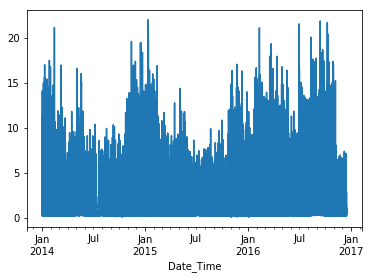

In [172]:
#check for trend and seasonality visualy
#dataset.Usage.plot()
dataset['2014-01-01':'2017-01-01'].Usage.plot()

C:\Users\nikhil\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\nikhil\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


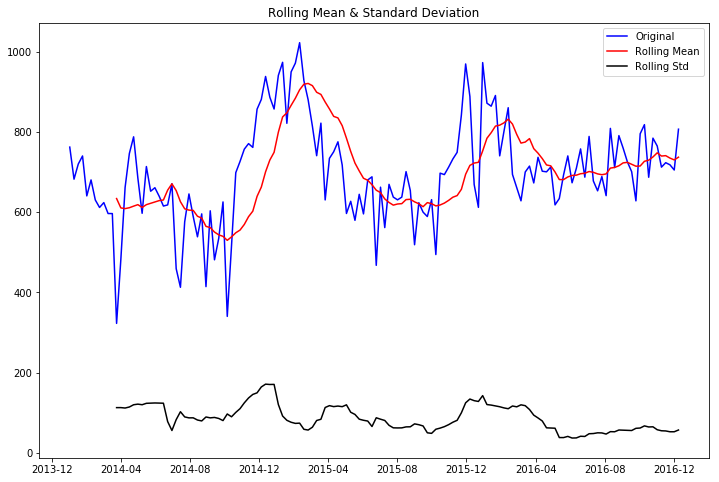

Results of Dickey-Fuller Test:
Test Statistic                  -3.249525
p-value                          0.017291
#Lags Used                      10.000000
Number of Observations Used    133.000000
Critical Value (1%)             -3.480500
Critical Value (5%)             -2.883528
Critical Value (10%)            -2.578496
dtype: float64


In [7]:
#check for seasonality of data


#Augmented Dickey-Fuller test 
#p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
#p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.
'''
#from statsmodels.tsa.stattools import adfuller
X = Usage_df.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
    
#Result:p-value less the 0.5 so null hypothesis fails(#it is not statonary).Therefore it is stationary and has no unit root.



#from statsmodels.tsa.stattools import adfuller
#import numpy as np
'''

#timeseries = np.log(df.Usage)
timeseries = df
def test_stationarity(timeseries):


    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
test_stationarity(timeseries)



C:\Users\nikhil\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\nikhil\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


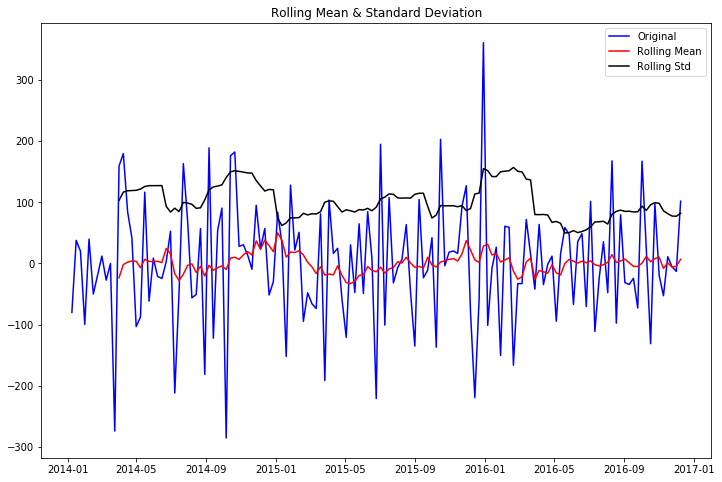

Results of Dickey-Fuller Test:
Test Statistic                -9.292219e+00
p-value                        1.171456e-15
#Lags Used                     3.000000e+00
Number of Observations Used    1.390000e+02
Critical Value (1%)           -3.478294e+00
Critical Value (5%)           -2.882568e+00
Critical Value (10%)          -2.577983e+00
dtype: float64


In [8]:
df['first_diff'] = df - df.shift(1)
test_stationarity(df.first_diff.dropna(inplace= False))

#Result:d=1

In [15]:
# view summary of model

model = ARIMA(Usage_df,order=(5,1,1))
model_fit = model.fit(disp=0)
#When fitting the model, a lot of debug information is provided about the fit of the linear regression model. 
#We can turn this off by setting the disp argument to 0.
print(model_fit.summary())
# plot residual errors
#residuals = DataFrame(model_fit.resid)
#residuals.plot()
#pyplot.show()
#residuals.plot(kind='kde')
#pyplot.show()
#print(residuals.describe())

#test = sm.OLS(y, X.astype(float)).fit()
#dff2=dff2.to_frame()


C:\Users\nikhil\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\nikhil\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\nikhil\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Usage   No. Observations:               103674
Model:                 ARIMA(5, 1, 1)   Log Likelihood             -172847.789
Method:                       css-mle   S.D. of innovations              1.282
Date:                Tue, 31 Jul 2018   AIC                         345711.578
Time:                        01:22:12   BIC                         345787.970
Sample:                    01-01-2014   HQIC                        345734.723
                         - 12-15-2016                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.576e-07    8.5e-06      0.054      0.957   -1.62e-05    1.71e-05
ar.L1.D.Usage     0.2351      0.003     75.598      0.000       0.229       0.241
ar.L2.D.Usage     0.0641      0.003     

In [18]:
#implementing ARIMA model and getting predictions
X=df.values
#X = Usage_df.values
size = int(len(X) * 0.90)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

#len(train)
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,1))
#When fitting the model, a lot of debug information is provided about the fit of the linear regression model. 
#We can turn this off by setting the disp argument to 0.
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    predi = output[0]
    predictions.append(predi)
    obs = test[t]
    history.append(obs)
    print('forecasted=%f, expected=%f' % (predi, obs))
    




C:\Users\nikhil\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\nikhil\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\nikhil\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


forecasted=773.871115, expected=759.501850
forecasted=728.811659, expected=725.211800
forecasted=775.135952, expected=700.951883
forecasted=706.566050, expected=628.172633
forecasted=683.486051, expected=795.404133
forecasted=756.503273, expected=818.156433
forecasted=768.937906, expected=687.002583
forecasted=715.384293, expected=784.512100
forecasted=740.734847, expected=764.983138
forecasted=777.345149, expected=712.280810
forecasted=758.232096, expected=723.324081
forecasted=707.135334, expected=718.020838
forecasted=736.140179, expected=705.064383
forecasted=719.774172, expected=806.833994


TypeError: cannot convert the series to <class 'float'>

Test MAPE: 7.394
Test MSE: 3913.620
Test MAE: 54.725
Test RMSE: 62.559


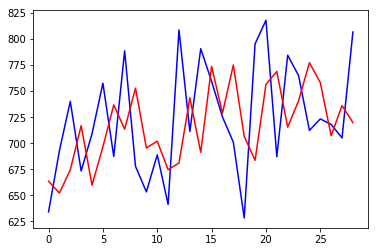

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#from sklearn.utils import check_arrays
#from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt
error = mean_squared_error(test, predictions)
MAE=mean_absolute_error(test, predictions)

RMSE = sqrt(mean_squared_error(test,predictions))

def mean_absolute_percentage_error(y_true, y_pred): 
  #  y_true, y_pred = check_array(y_true, y_pred)
    return np.mean((np.abs(y_true - y_pred) / y_true)) * 100


MAPE=mean_absolute_percentage_error(test,predictions)
print('Test MAPE: %.3f' % MAPE)

#predictions1=

#MAPE=mean_absolute_percentage_error(test, predictions)

print('Test MSE: %.3f' % error)
print('Test MAE: %.3f' % MAE)
print('Test RMSE: %.3f' % RMSE)


pyplot.plot(test,color='blue',label='Usage')
pyplot.plot(predictions, color='red',label='Predictions')
pyplot.show()


# SARIMA MODEL

In [21]:
#implementing SARIMA model and getting predictions
X=df.values
#df1=df['Usage']
#X = df1.values


size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

#len(train)
for t in range(len(test)):
    model = sm.tsa.statespace.SARIMAX(history, trend='n', order=(5,1,1), seasonal_order=(1,1,1,12))
#When fitting the model, a lot of debug information is provided about the fit of the linear regression model. 
#We can turn this off by setting the disp argument to 0.
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    predi = output[0]
    predictions.append(predi)
    obs = test[t]
    history.append(obs)
    print('forecasted=%f, expected=%f' % (predi, obs))

C:\Users\nikhil\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


forecasted=673.362312, expected=633.967213


C:\Users\nikhil\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


forecasted=617.982648, expected=692.730929


C:\Users\nikhil\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


forecasted=657.490394, expected=740.217585


C:\Users\nikhil\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


forecasted=693.295882, expected=673.257727


C:\Users\nikhil\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


forecasted=605.362859, expected=709.025162


C:\Users\nikhil\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


forecasted=652.972943, expected=757.641720


C:\Users\nikhil\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


forecasted=757.827989, expected=687.247031


C:\Users\nikhil\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


forecasted=724.356783, expected=788.765600


C:\Users\nikhil\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


forecasted=816.313226, expected=677.754200
forecasted=724.562955, expected=653.207117


C:\Users\nikhil\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


forecasted=704.332468, expected=688.835167


C:\Users\nikhil\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


forecasted=690.702935, expected=641.148133


C:\Users\nikhil\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


forecasted=680.313361, expected=808.825600


C:\Users\nikhil\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


forecasted=732.156040, expected=711.275117


C:\Users\nikhil\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


forecasted=683.289472, expected=790.817650


C:\Users\nikhil\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


forecasted=748.876499, expected=759.501850


C:\Users\nikhil\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


forecasted=686.194802, expected=725.211800
forecasted=727.174397, expected=700.951883
forecasted=722.504106, expected=628.172633


C:\Users\nikhil\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


forecasted=694.660486, expected=795.404133


C:\Users\nikhil\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


forecasted=799.195050, expected=818.156433


C:\Users\nikhil\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


forecasted=788.971227, expected=687.002583


C:\Users\nikhil\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


forecasted=718.348556, expected=784.512100


C:\Users\nikhil\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


forecasted=744.286427, expected=764.983138


C:\Users\nikhil\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


forecasted=774.029996, expected=712.280810


C:\Users\nikhil\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


forecasted=738.403991, expected=723.324081


C:\Users\nikhil\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


forecasted=723.826847, expected=718.020838


C:\Users\nikhil\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


forecasted=717.341914, expected=705.064383
forecasted=689.158946, expected=806.833994


C:\Users\nikhil\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [10]:
mod = sm.tsa.statespace.SARIMAX(df.values, trend='n', order=(5,1,1), seasonal_order=(1,1,1,12))
results = mod.fit()
print (results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(5, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -788.707
Date:                            Tue, 31 Jul 2018   AIC                           1595.415
Time:                                    01:12:46   BIC                           1622.143
Sample:                                         0   HQIC                          1606.276
                                            - 144                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5197      9.329      0.056      0.956     -17.765      18.804
ar.L2          0.1058      4.460   

Test MAPE: 8.489
Test MSE: 5369.721
Test MAE: 61.498
Test RMSE: 73.278


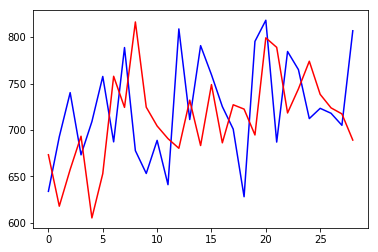

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#from sklearn.utils import check_arrays
#from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt
error = mean_squared_error(test, predictions)
MAE=mean_absolute_error(test, predictions)

RMSE = sqrt(mean_squared_error(test,predictions))

def mean_absolute_percentage_error(y_true, y_pred): 
  #  y_true, y_pred = check_array(y_true, y_pred)
    return np.mean((np.abs(y_true - y_pred) / y_true)) * 100


MAPE=mean_absolute_percentage_error(test,predictions)
print('Test MAPE: %.3f' % MAPE)

#predictions1=

#MAPE=mean_absolute_percentage_error(test, predictions)

print('Test MSE: %.3f' % error)
print('Test MAE: %.3f' % MAE)
print('Test RMSE: %.3f' % RMSE)



pyplot.plot(test,color='blue',label='Usage')
pyplot.plot(predictions, color='red',label='Predictions')
pyplot.show()


# 3)APPLYING ARIMAX MODEL

In [23]:
model3=sm.tsa.ARIMA(endog=dataset['Usage'].values,exog=dataset['temperature'].values,order=[5,1,0])
results3=model3.fit()
print(results3.summary())


C:\Users\nikhil\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\nikhil\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:               103674
Model:                 ARIMA(5, 1, 0)   Log Likelihood             -178015.381
Method:                       css-mle   S.D. of innovations              1.347
Date:                Tue, 31 Jul 2018   AIC                         356046.762
Time:                        01:38:18   BIC                         356123.154
Sample:                             1   HQIC                        356069.907
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0050      0.004      1.263      0.207      -0.003       0.013
x1         -9.943e-05   7.32e-05     -1.359      0.174      -0.000     4.4e-05
ar.L1.D.y     -0.6574      0.003   -213.257      0.0

In [19]:
'''#implementing ARIMAX model and getting predictions

X=df.values
#X = dataset['Usage'].values
#X=dff2.Usage
Y=dataset['temperature'].resample("10800T").sum().values
#Y=dataset['temperature'].values
size_X_Y = int(len(X) * 0.90)

train, test = X[0:size_X_Y], X[size_X_Y:len(X)]
train_Y,test_Y= Y[0:size_X_Y], Y[size_X_Y:len(Y)]
history = [x for x in train]
history_Y=[y for y in train_Y]
predictions = list()

for t in range(len(test)):
    #model = ARIMA(history, order=(20,0,0))
    model3 = sm.tsa.ARIMA(endog=history,exog=history_Y,order=[1,1,0])
    model_fit = model3.fit()
    output = model_fit.forecast()
    predi = output[0]
    predictions.append(predi)
    obs = test[t]
    obs_Y=test_Y[t]
    history.append(obs)
    history_Y.append(obs_Y)
    print('predicted=%f, expected=%f' % (predi, obs))
    
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
#test = sm.OLS(y, X.astype(float)).fit()
#len(train)

'''

C:\Users\nikhil\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\nikhil\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\nikhil\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


TypeError: unsupported operand type(s) for *: 'NoneType' and 'float'

In [ ]:
#EXTRAS

In [17]:
#checking 'Usage' variable is stationary or not(for trend and seasonalilty)
'''import statsmodels.api as sm
result=(sm.tsa.stattools.adfuller(dataset['Usage']))
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
    
#Result:p-value less the 0.5 so null hypothesis fails(#it is not statonary).Therefore it is stationary and has no unit root.
'''

"import statsmodels.api as sm\nresult=(sm.tsa.stattools.adfuller(dataset['Usage']))\nprint('ADF Statistic: %f' % result[0])\nprint('p-value: %f' % result[1])\nprint('Critical Values:')\nfor key, value in result[4].items():\n\tprint('\t%s: %.3f' % (key, value))\n    \n#Result:p-value less the 0.5 so null hypothesis fails(#it is not statonary).Therefore it is stationary and has no unit root.\n"

In [222]:
'''#check for seasonality of data


#Augmented Dickey-Fuller test 
#p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
#p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

#from statsmodels.tsa.stattools import adfuller
X = Usage_df.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
    
#Result:p-value less the 0.5 so null hypothesis fails(#it is not statonary).Therefore it is stationary and has no unit root.



#from statsmodels.tsa.stattools import adfuller
#import numpy as np


#timeseries = np.log(df.Usage)
timeseries = dataset['2014-01-01':'2015-01-01'].WaterHeater
def test_stationarity(timeseries):


    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
test_stationarity(timeseries)

'''

"#check for seasonality of data\n\n\n#Augmented Dickey-Fuller test \n#p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.\n#p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.\n\n#from statsmodels.tsa.stattools import adfuller\nX = Usage_df.values\nresult = adfuller(X)\nprint('ADF Statistic: %f' % result[0])\nprint('p-value: %f' % result[1])\nprint('Critical Values:')\nfor key, value in result[4].items():\n\tprint('\t%s: %.3f' % (key, value))\n    \n#Result:p-value less the 0.5 so null hypothesis fails(#it is not statonary).Therefore it is stationary and has no unit root.\n\n\n\n#from statsmodels.tsa.stattools import adfuller\n#import numpy as np\n\n\n#timeseries = np.log(df.Usage)\ntimeseries = dataset['2014-01-01':'2015-01-01'].WaterHeater\ndef test_stationarity(timeseries):\n\n\n    #Determing rolling statistics\n    rolmean = pd.rolling_mean(timeseries, window=12)\n    rolstd = 

In [137]:
'''
#checking 'temperature' variable is stationary or not(for trend and seasonalilty)

import statsmodels.api as sm
result=(sm.tsa.stattools.adfuller(dataset['temperature']))
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

#Result:p-value less the 0.5 so null hypothesis fails(#it is not statonary).Therefore it is stationary and has no unit root.
'''

"\n#checking 'temperature' variable is stationary or not(for trend and seasonalilty)\n\nimport statsmodels.api as sm\nresult=(sm.tsa.stattools.adfuller(dataset['temperature']))\nprint('ADF Statistic: %f' % result[0])\nprint('p-value: %f' % result[1])\nprint('Critical Values:')\nfor key, value in result[4].items():\n\tprint('\t%s: %.3f' % (key, value))\n\n#Result:p-value less the 0.5 so null hypothesis fails(#it is not statonary).Therefore it is stationary and has no unit root.\n"

In [18]:
'''#checking 'humidity' variable is stationary or not(for trend and seasonalilty)
#import statsmodels.api as sm
result=(sm.tsa.stattools.adfuller(dataset['humidity']))
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
    
#Result:p-value less the 0.5 so null hypothesis fails(#it is not statonary).Therefore it is stationary and has no unit root.
'''

"#checking 'humidity' variable is stationary or not(for trend and seasonalilty)\n#import statsmodels.api as sm\nresult=(sm.tsa.stattools.adfuller(dataset['humidity']))\nprint('ADF Statistic: %f' % result[0])\nprint('p-value: %f' % result[1])\nprint('Critical Values:')\nfor key, value in result[4].items():\n\tprint('\t%s: %.3f' % (key, value))\n    \n#Result:p-value less the 0.5 so null hypothesis fails(#it is not statonary).Therefore it is stationary and has no unit root.\n"

In [23]:
#dataset['forecast_OLS']=results1.predict(start = 120, end= 150, dynamic= True) 
#dataset[['Usage', 'forecast_OLS']].ix[-20:].plot(figsize=(12, 8))

In [ ]:
#with diffencing
#import statsmodels.api as sm
#dff2['diffR']=(series['Refrigerator'].astype(float)).diff()
#dff2['diffT']=(series['temperature'].astype(float)).diff()
#dff2['dfffH']=(series['humidity'].astype(float)).diff()



#model2=sm.OLS(endog=(dff2['diffR'].astype(float)).dropna(),exog=(dff2[['diffT','diffH']].astype(float)).dropna())
#results2=model2.fit()
#print(results2.summary())

In [ ]:
#implementing ARIMAX model and getting predictions

'''
X = dataset[['Usage','temperature']]
#X=dff2.Usage
size = int(len(X) * 0.99)
train, test = X[0:size], X[size:len(X)]
#history = [x for x in train]
predictions = list()

for t in range(len(test)):
    #model = ARIMA(history, order=(20,0,0))
    model3 = sm.tsa.ARIMA(endog=(X['Usage']).dropna(),exog=(X[['temperature']]).dropna(),order=[1,0,0])
    model_fit = model3.fit()
    model_fit
    output = model_fit.forecast()
    predi = output[0]
    predictions.append(predi)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (predi, obs))
    
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
#test = sm.OLS(y, X.astype(float)).fit()
#len(train)

'''

In [136]:
'''
model3=sm.tsa.ARIMA(endog=dataset['Usage'],exog=dataset[['WaterHeater']],order=[1,1,0])
results3=model3.fit()
print(results3.summary())
'''

"\nmodel3=sm.tsa.ARIMA(endog=dataset['Usage'],exog=dataset[['WaterHeater']],order=[1,1,0])\nresults3=model3.fit()\nprint(results3.summary())\n"

In [135]:
#df['forecast'] = results3.predict(start = 120, end= 150, dynamic= True)  
#df[['Usage', 'forecast']].ix[-20:].plot(figsize=(12, 8))




In [134]:
#dataset['forecast_OLS']=results3.predict(start = 130, end= 150, dynamic= True) 
#dataset[['Usage', 'forecast_OLS']].ix[-20:].plot(figsize=(12, 8))

In [ ]:
#plt.scatter(dataset['temperature'].tail(10),dataset['humidity'].tail(10))
#plt.xlabel("temperature")
#plt.ylabel("humidity")

In [132]:
'''
from sklearn.metrics import r2_score
from sklearn import linear_model


#z=np.column_stack(dataset['temperature'],dataset['humidity'])
lm=linear_m
from sklearn import datasets, linear_model
X=df.values
#X = dataset[['Usage']
#X=dff2.Usage
Y=dataset['temperature'].resample("10800T").sum().values
size_X_Y = int(len(X) * 0.99)

train_X, test_X = X[0:size_X_Y], X[size_X_Y:len(X)]
train_Y,test_Y= Y[0:size_X_Y], Y[size_X_Y:len(X)]

regr = linear_model.LinearRegression()
regr.fit([train_X],[train_Y])
pred = regr.predict([test_X])
#print('Coefficients: \n', regr.coef_)
model.LinearRegression()
#model_fit=lm.fit(dataset['temperature'],dataset['humidity'])
model_fit=lm.fit(dependent_var,independent_var)

'''

'\nfrom sklearn.metrics import r2_score\nfrom sklearn import linear_model\n\n\n#z=np.column_stack(dataset[\'temperature\'],dataset[\'humidity\'])\nlm=linear_m\nfrom sklearn import datasets, linear_model\nX=df.values\n#X = dataset[[\'Usage\']\n#X=dff2.Usage\nY=dataset[\'temperature\'].resample("10800T").sum().values\nsize_X_Y = int(len(X) * 0.99)\n\ntrain_X, test_X = X[0:size_X_Y], X[size_X_Y:len(X)]\ntrain_Y,test_Y= Y[0:size_X_Y], Y[size_X_Y:len(X)]\n\nregr = linear_model.LinearRegression()\nregr.fit([train_X],[train_Y])\npred = regr.predict([test_X])\n#print(\'Coefficients: \n\', regr.coef_)\nmodel.LinearRegression()\n#model_fit=lm.fit(dataset[\'temperature\'],dataset[\'humidity\'])\nmodel_fit=lm.fit(dependent_var,independent_var)\n\n'

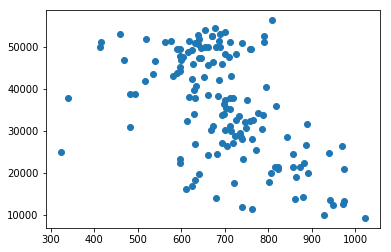

In [147]:

#Linear regression
from sklearn import datasets, linear_model
X=df.values
#X = dataset[['Usage']
#X=dff2.Usage
Y=dataset['temperature'].resample("10800T").sum().values
size_X_Y = int(len(X) * 0.99)

train_X, test_X = X[0:size_X_Y], X[size_X_Y:len(X)]
train_Y,test_Y= Y[0:size_X_Y], Y[size_X_Y:len(X)]

regr = linear_model.LinearRegression()
model_fit=regr.fit([train_X],[train_Y])
#print(model_fit.summary())

plt.scatter(X,Y)
#pred = regr.predict([test_X])
#print('Coefficients: \n', regr.coef_)


In [ ]:
def slope_intersept(x_val,y_val):
    m=((np.mean(X)_np.mean(Y)))-np.mean(X*Y)a